# **Capstone Project**
-------

## **Deep Learning Methods for Facial Emotion Recognition**

## **MIT Applied Data Science Program - July 2022E cohort**

## Monica Palacios Boyce
------

# **Executive Summary**
### This project aims to construct a best-fit Convolutional Neural Network (CNN) model that accurately performs **multi-class classification for facial emotion recognition**. Specifically, the model must accurately **detect four specific emotions** in images of people, including: ‘happy’, ‘sad’, ‘neutral’, and ‘surprise’.  

### A series of CNN models were designed, optimized and evaluated. Transfer learning strategies were also employed, utilizing the pre-trained feature-extraction layers of well tested high performance CNNs, namely,  VGG16, ResNet V1, and EfficientNet. 

### Finally, a deeper complex CNN was designed and assessed for accuracy of multi-classification of facial characteristic-emotional state encoding or recognition. Of the models assessed, the last model (**PRESENTED IN THIS NOTEBOOK**) was identified as the best performing for the stated purposes, with a overall ~93% accuracy of discriminating correct emotions on a test set of facial images. 

### Previous work characterizing performance of early CNN models and transfer learning are shown in these notebooks:
###     - Initial models (Milestone 1 & 2 (FER 2013)) LINK PENDING
###     - Transfer Learning LINK PENDING

------

## **Mounting the Drive**

**NOTE:** It is recommended that you use Google Colab with the GPU option selected to open and run the code in this notebook. 

In [ ]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Importing relevant libraries**

In [ ]:
import zipfile
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import tensorflow as tf

# Importing Deep Learning Libraries

from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D, LeakyReLU
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

In [ ]:
# Clearing backend

from tensorflow.keras import backend

backend.clear_session()

# Fixing the seed for random number generators
import random

np.random.seed(42)

random.seed(42)

tf.random.set_seed(42)

### **Load the data**
FER 2013: Classify facial expressions from 35,685 examples of 48x48 pixel grayscale images of faces. Images are categorized based on the emotion shown in the facial expressions (happiness, neutral, sadness, anger, surprise, disgust, fear).

**This projects uses a subset of this dataset wheree only the following emotions were used:
- happy
- sad
- neutral
- surprise

In [1]:
# Path of the data file from the Google drive

path = '/content/drive/MyDrive/Data_Science_Class/CAPSTONE_Project/CAP_proj_facial_emot_det/First-draft-w-GL-notebooks/Facial_emotion_images.zip'

# Data is provided as a zip file. The following extracts these files

with zipfile.ZipFile(path, 'r') as zip_ref:
    zip_ref.extractall()

NameError: name 'zipfile' is not defined

In [ ]:
picture_size = 48
folder_path = "Facial_emotion_images/"

## **Building a Complex Neural Network Architecture**

## **RGB Data Loader**

In [ ]:
batch_size  = 32
img_size = 48

#Training set dataloader

datagen_train = ImageDataGenerator(horizontal_flip = True,
                                   brightness_range = (0., 2.),
                                   rescale = 1./255,
                                   shear_range = 0.3)

train_set = datagen_train.flow_from_directory(folder_path + "train",
                                              target_size = (img_size, img_size),
                                              color_mode = 'rgb',
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              classes = ['happy', 'sad', 'neutral', 'surprise'],
                                              shuffle = True)

# Validation set dataloader

datagen_validation = ImageDataGenerator(horizontal_flip = True,
                                        brightness_range = (0., 2.),
                                        rescale = 1./255,
                                        shear_range = 0.3)

validation_set = datagen_validation.flow_from_directory(folder_path + "train",
                                                        target_size = (img_size, img_size),
                                                        color_mode = 'rgb',
                                                        batch_size = batch_size,
                                                        class_mode = 'categorical',
                                                        classes = ['happy', 'sad', 'neutral', 'surprise'],
                                                        shuffle = True)

#Testing set dataloader

datagen_test = ImageDataGenerator(horizontal_flip = True,
                                  brightness_range = (0., 2.),
                                  rescale = 1./255,
                                  shear_range = 0.3)

test_set = datagen_test.flow_from_directory(folder_path + "train",
                                            target_size = (img_size, img_size),
                                            color_mode = 'rgb',
                                            batch_size = batch_size,
                                            class_mode = 'categorical',
                                            classes = ['happy', 'sad', 'neutral', 'surprise'],
                                            shuffle = True)

Found 15109 images belonging to 4 classes.
Found 15109 images belonging to 4 classes.
Found 15109 images belonging to 4 classes.


# **Final model architecture - RGB**

- There are 5 Convolutional Blocks
- **FIRST Convolutional Block**
  - First Conv2D layer with **64 filters** and a **kernel size of 2**, 'same' padding, **input shape = (48, 48, 3)**. Use **'relu' activation**.
  - Add BatchNormalization layer followed by a LeakyRelU layer with Leaky ReLU parameter of **0.1**
  - Add MaxPooling2D layer with **pool size = 2**.
- **SECOND Convolutional Block**
  - Second Conv2D layer with **128 filters** and a **kernel size of 2**, **'same' padding** and **'relu' activation.**
  - Add BatchNormalization, LeakyRelU, Maxpooling2D
- **THIRD Convolutional Block**  
  - Third Conv2D layer with **512 filters** and a **kernel size of 2**, **'same' padding** and **'relu' activation.**
  - Add BatchNormalization, LeakyRelU, Maxpooling2D
- **FOURTH Convolutional Block**
  - Fourth Conv2D layer having **512 filters** and a **kernel size of 2**, **'same' padding** and **'relu' activation.**
  - Add BatchNormalization, LeakyRelU, Maxpooling2D
- **Fifth Convolutional Block**
  - Fifth layer, having **128 filters** and a **kernel size of 2**, **'same' padding** and **'relu' activation.**
  - Add BatchNormalization, LeakyRelU, Maxpooling2D
- **Flatten layer**
- **First Fully Connected Block**
  - **First Dense layer** with **256 neurons**
  - BatchNormalization layer, a **'relu'** Activation, and a Dropout layer.
- **SECOND Dense layer** with **512 neurons**
  - Add BatchNormalization layer, **relu** activation, and a Dropout layer.
- **Final Dense layer with 4 neurons.** + 'softmax' as activation


In [ ]:
no_of_classes = 4

FINALmodel = Sequential()

# Add FIRST CNN Block

# Add the FIRST convolutional layer with 64 filters and a kernel size of 2. Use the 'same' padding and activation = 'relu'
FINALmodel.add(Conv2D(filters = 64, kernel_size = (2, 2), activation = 'relu', padding = "same", input_shape = (48, 48, 3)))

# Add a BatchNormalization layer
FINALmodel.add(BatchNormalization())

#Add a layer with LeakyReLU and a slope = 0.1
FINALmodel.add(LeakyReLU(0.1))

#Add a layer with Max Pooling, pool size = 2
FINALmodel.add(MaxPooling2D(pool_size = (2, 2)))


# Add 2nd CNN Block

# Add the SECOND convolutional layer with 128 filters and a kernel size of 2. Use the 'same' padding and activation = 'relu'
FINALmodel.add(Conv2D(filters = 128, kernel_size = (2, 2), activation = 'relu', padding = "same"))

# Add a BatchNormalization layer
FINALmodel.add(BatchNormalization())

#Add a layer with LeakyReLU and a slope = 0.1
FINALmodel.add(LeakyReLU(0.1))

#Add a layer with Max Pooling, pool size = 2
FINALmodel.add(MaxPooling2D(pool_size = (2, 2)))


# Add 3rd CNN Block

# Add the THIRD convolutional layer with 512 filters and a kernel size of 2. Use the 'same' padding and activation = 'relu'
FINALmodel.add(Conv2D(filters = 512, kernel_size = (2, 2), activation = 'relu', padding = "same"))

# Add a BatchNormalization layer
FINALmodel.add(BatchNormalization())

#Add a layer with LeakyReLU and a slope = 0.1
FINALmodel.add(LeakyReLU(0.1))

#Add a layer with Max Pooling, pool size = 2
FINALmodel.add(MaxPooling2D(pool_size = (2, 2)))

# Add 4th CNN Block

# Add the FOURTH convolutional layer with 512 filters and a kernel size of 2. Use the 'same' padding and activation = 'relu'
FINALmodel.add(Conv2D(filters = 512, kernel_size = (2, 2), activation = 'relu', padding = "same"))

# Add a BatchNormalization layer
FINALmodel.add(BatchNormalization())

#Add a layer with LeakyReLU and a slope = 0.1
FINALmodel.add(LeakyReLU(0.1))

#Add a layer with Max Pooling, pool size = 2
FINALmodel.add(MaxPooling2D(pool_size = (2, 2)))


# Add 5th CNN Block

# Add the FIFTH convolutional layer with 128 filters and a kernel size of 2. Use the 'same' padding and activation = 'relu'
FINALmodel.add(Conv2D(filters = 128, kernel_size = (2, 2), activation = 'relu', padding = "same"))

# Add a BatchNormalization layer
FINALmodel.add(BatchNormalization())

#Add a layer with LeakyReLU and a slope = 0.1
FINALmodel.add(LeakyReLU(0.1))

#Add a layer with Max Pooling, pool size = 2
FINALmodel.add(MaxPooling2D(pool_size = (2, 2)))


# Adding a flatten layer
FINALmodel.add(Flatten())


# First fully connected BLOCK with 256 neurons followed by a BatchNormalization layer, a 'relu' Activation, and a Dropout layer.

# First fully connected layer
FINALmodel.add(Dense(256, activation = 'relu'))

# Add a BatchNormalization layer
FINALmodel.add(BatchNormalization())

# Add a Dropout layer w 0.2
FINALmodel.add(Dropout(0.2))

# SECOND fully connected BLOCK with 512 neurons, again followed by a BatchNormalization layer, relu activation, and a Dropout layer.

# Second fully connected layer
FINALmodel.add(Dense(512, activation = 'relu'))

# Add a Dropout layer w 0.2
FINALmodel.add(Dropout(0.2))

#Final fully connected layer - OUTPUT layer
FINALmodel.add(Dense(no_of_classes, activation = 'softmax'))

## **Visualizing the Final Model**

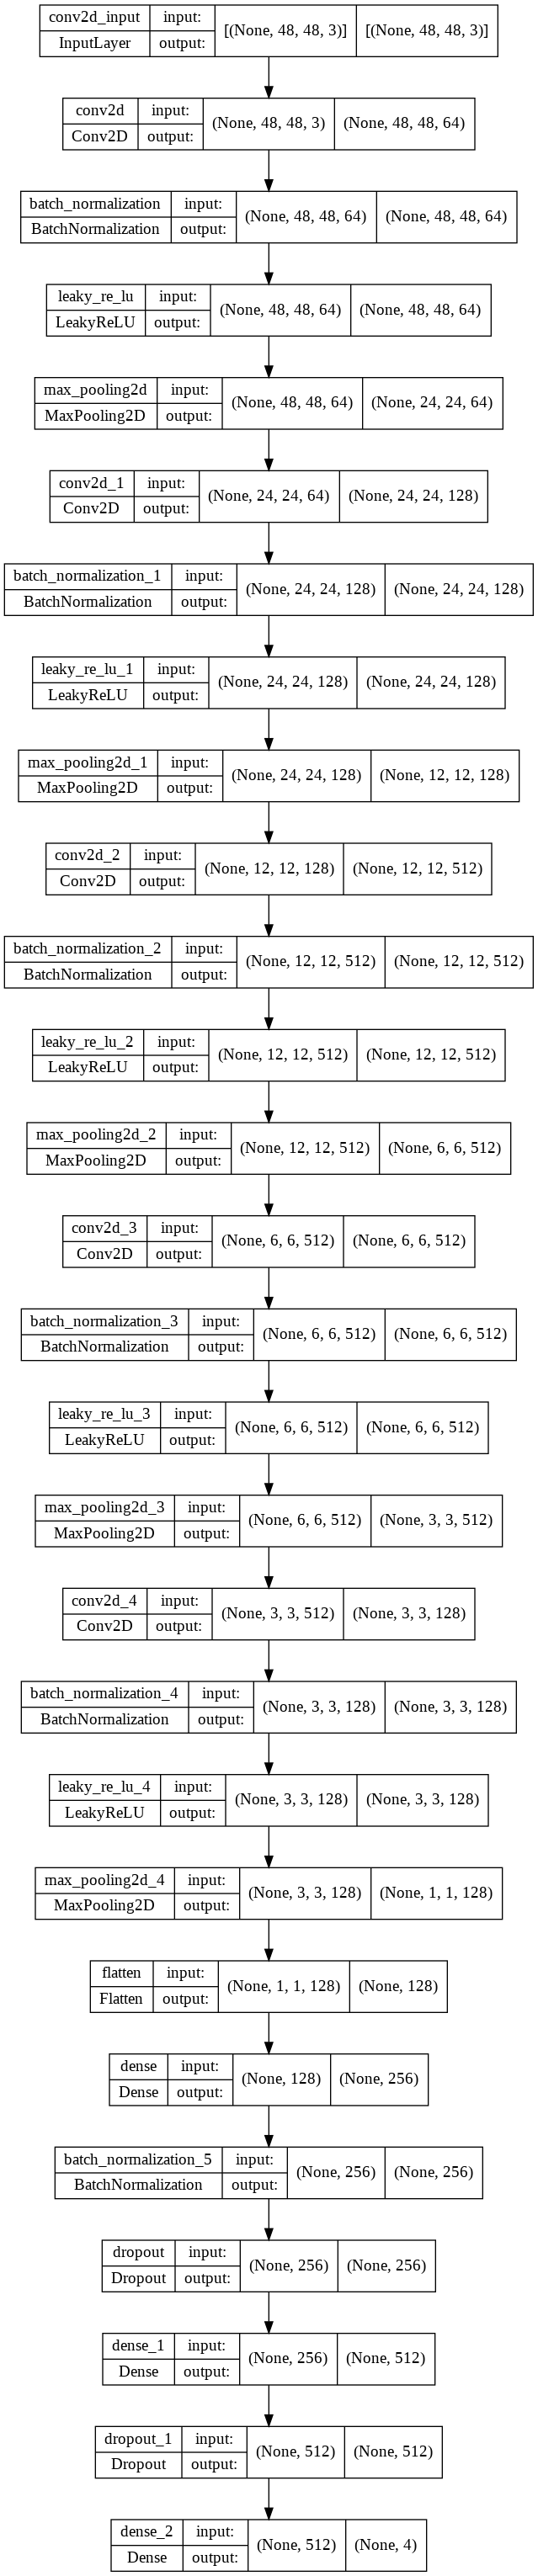

In [ ]:
img_file = './FINALmodel.png'

tf.keras.utils.plot_model(FINALmodel, to_file=img_file, show_shapes=True, show_layer_names=True)

### **Compiling and Training the Final Model**

In [ ]:
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, CSVLogger

epochs = 35

steps_per_epoch = train_set.n//train_set.batch_size
validation_steps = validation_set.n//validation_set.batch_size

checkpoint = ModelCheckpoint("FINALmodel.h5", monitor = 'val_accuracy',
                            save_weights_only = True, model = 'max', verbose = 1)

reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.1, patience = 2, min_lr = 0.0001 , model = 'auto')

callbacks = [checkpoint, reduce_lr]

In [ ]:
# Compiling the Final Model using loss function = categorical crossentropy, Adam Optimizer with 0.003 learning rate and metrics to 'accuracy'.

FINALmodel.compile(loss = 'categorical_crossentropy',
               optimizer = tf.keras.optimizers.Adamax(learning_rate = 0.003),
               metrics = ['accuracy'])

In [ ]:
# Fitting the Final Model using train_set as the training data and validation_set as the validation data, for 35 epochs.

history_FINALmodel = FINALmodel.fit(train_set,
                     validation_data=validation_set,
                     epochs=35)

Epoch 1/35
473/473 [==============================] - 52s 84ms/step - loss: 1.4346 - accuracy: 0.3379 - val_loss: 1.5283 - val_accuracy: 0.2766
Epoch 2/35
473/473 [==============================] - 39s 82ms/step - loss: 1.2026 - accuracy: 0.4454 - val_loss: 1.3792 - val_accuracy: 0.3968
Epoch 3/35
473/473 [==============================] - 40s 84ms/step - loss: 1.0314 - accuracy: 0.5448 - val_loss: 1.0035 - val_accuracy: 0.5663
Epoch 4/35
473/473 [==============================] - 39s 82ms/step - loss: 0.9502 - accuracy: 0.5917 - val_loss: 0.9865 - val_accuracy: 0.5763
Epoch 5/35
473/473 [==============================] - 39s 82ms/step - loss: 0.9008 - accuracy: 0.6161 - val_loss: 0.9620 - val_accuracy: 0.5874
Epoch 6/35
473/473 [==============================] - 39s 82ms/step - loss: 0.8490 - accuracy: 0.6405 - val_loss: 0.8070 - val_accuracy: 0.6619
Epoch 7/35
473/473 [==============================] - 40s 84ms/step - loss: 0.8156 - accuracy: 0.6611 - val_loss: 0.7860 - val_accuracy:

### **Evaluating the Final Model on the test set**

In [ ]:
# Evaluating the Final Model performance on the TEST SET

FINALmodel.evaluate(test_set)

473/473 [==============================] - 19s 39ms/step - loss: 0.1809 - accuracy: 0.9331


[0.1808716356754303, 0.9330862164497375]

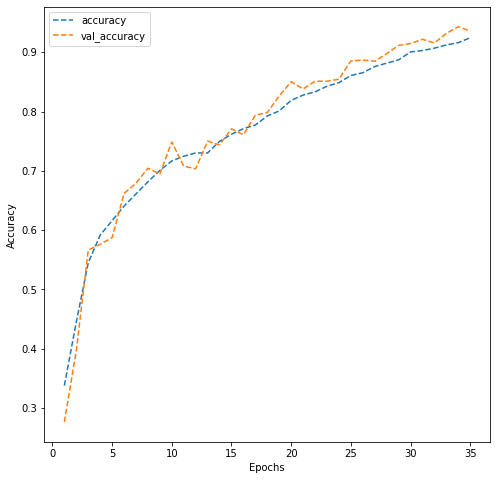

In [ ]:
# Plotting the accuracy curves for the training and validation sets

dict_hist = history_FINALmodel.history

list_ep = [i for i in range(1, 36)]

plt.figure(figsize = (8, 8))

plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'accuracy')

plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'val_accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.legend()

plt.show()

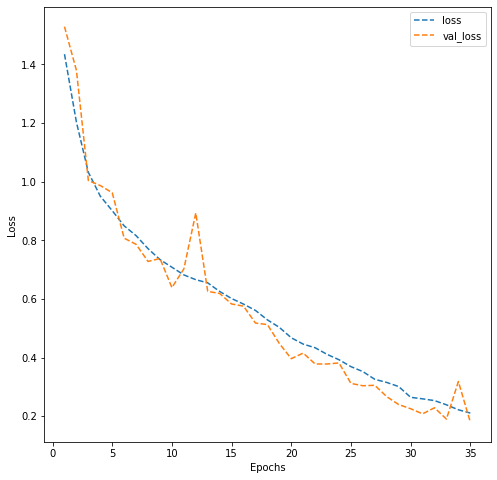

In [ ]:
# Plotting the loss curves for the training and validation sets

dict_hist = history_FINALmodel.history

list_ep = [i for i in range(1, 36)]

plt.figure(figsize = (8, 8))

plt.plot(list_ep, dict_hist['loss'], ls = '--', label = 'loss')

plt.plot(list_ep, dict_hist['val_loss'], ls = '--', label = 'val_loss')

plt.ylabel('Loss')

plt.xlabel('Epochs')

plt.legend()

plt.show()

### **Plotting the Confusion Matrix for the chosen final model**

Found 128 images belonging to 4 classes.
              precision    recall  f1-score   support

           0       0.89      0.89      0.89         9
           1       1.00      0.86      0.92         7
           2       0.73      0.89      0.80         9
           3       1.00      0.86      0.92         7

    accuracy                           0.88        32
   macro avg       0.90      0.87      0.88        32
weighted avg       0.89      0.88      0.88        32



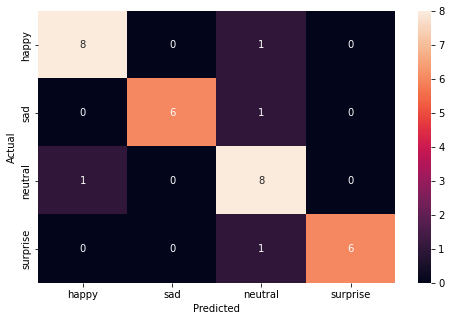

In [ ]:
# Plot the confusion matrix and generate a classification report for the model

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

test_set = datagen_test.flow_from_directory(folder_path + "test",
                                            target_size = (img_size,img_size),
                                            color_mode = 'rgb',
                                            batch_size = 32,
                                            class_mode = 'categorical',
                                            classes = ['happy', 'sad', 'neutral', 'surprise'],
                                            shuffle = True) 

test_images, test_labels = next(test_set)

# Write the name of your chosen model in the blank
pred = FINALmodel.predict(test_images)
pred = np.argmax(pred, axis = 1) 
y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)
plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['happy', 'sad', 'neutral', 'surprise'], yticklabels = ['happy', 'sad', 'neutral', 'surprise'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()